<a href="https://colab.research.google.com/github/almohsinkhan/titanic-Survived-Pridiction/blob/main/iris_data_species_pridction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/Iris Project Notebook.pdf
/kaggle/input/iris-dataset/IRIS.csv


In [ ]:
df = pd.read_csv('/kaggle/input/iris-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


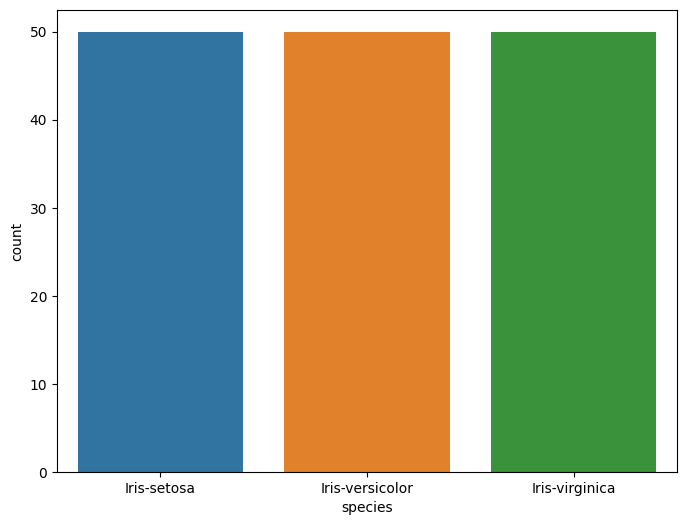

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=df['species'])
plt.show()

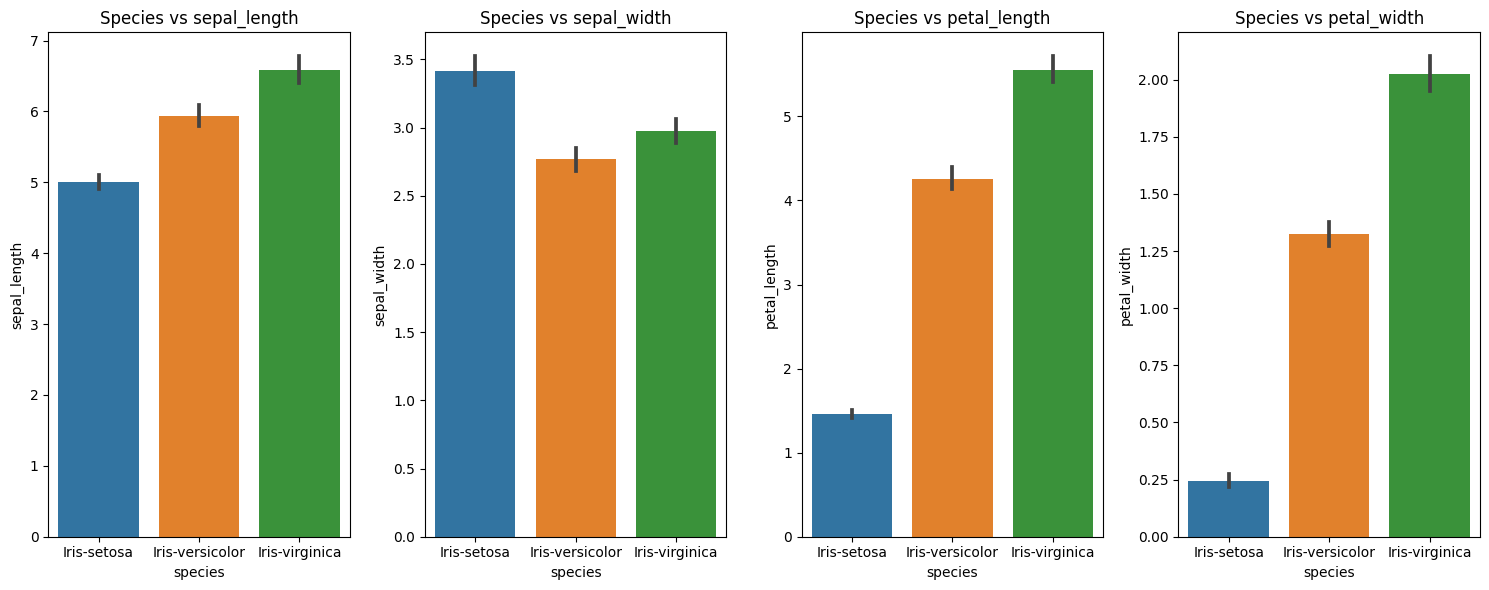

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))  # 2 rows, 3 cols grid
axes = axes.flatten()  # make it 1D for easy indexing

for i, col in enumerate(df.columns[:-1]):  # exclude 'species' column
    sns.barplot(x='species', y=col, data=df, estimator='mean', ax=axes[i])
    axes[i].set_title(f"Species vs {col}")

plt.tight_layout()
plt.show()


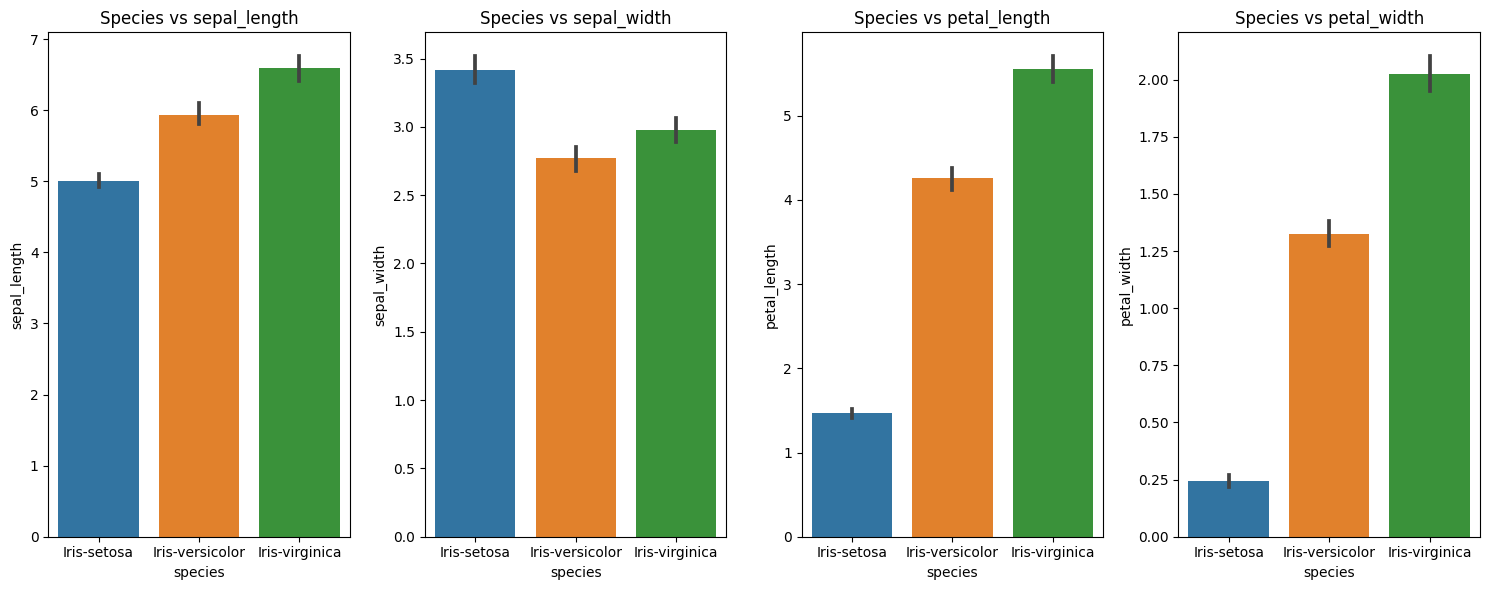

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))  # 2 rows, 3 cols grid
axes = axes.flatten()  # make it 1D for easy indexing

for i, col in enumerate(df.columns[:-1]):  # exclude 'species' column
    sns.barplot(x='species', y=col, data=df, estimator='mean', ax=axes[i])
    axes[i].set_title(f"Species vs {col}")

plt.tight_layout()
plt.show()


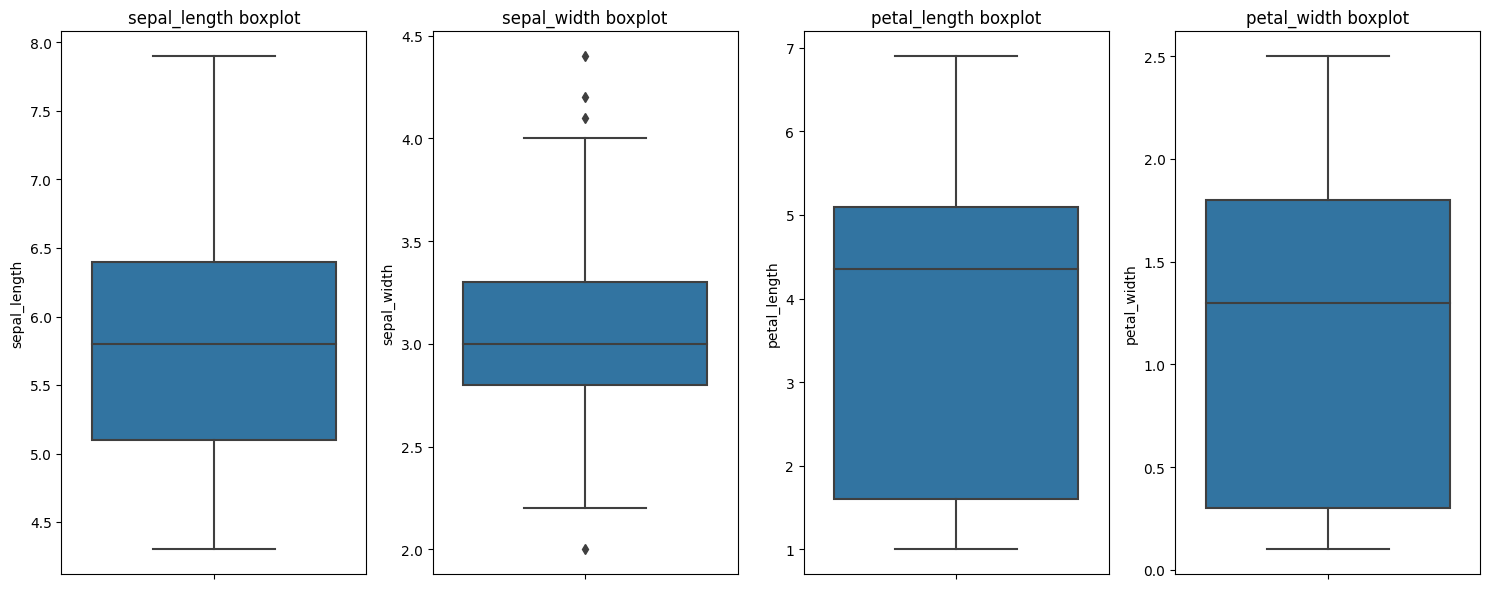

In [ ]:
fig,axes = plt.subplots(1,4, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(y=df[col], ax= axes[i])
    axes[i].set_title(f"{col} boxplot")

plt.tight_layout()
plt.show()

removing of outliers can cam make dataset baised so we insted of removing we going to make it in rang of other data set value

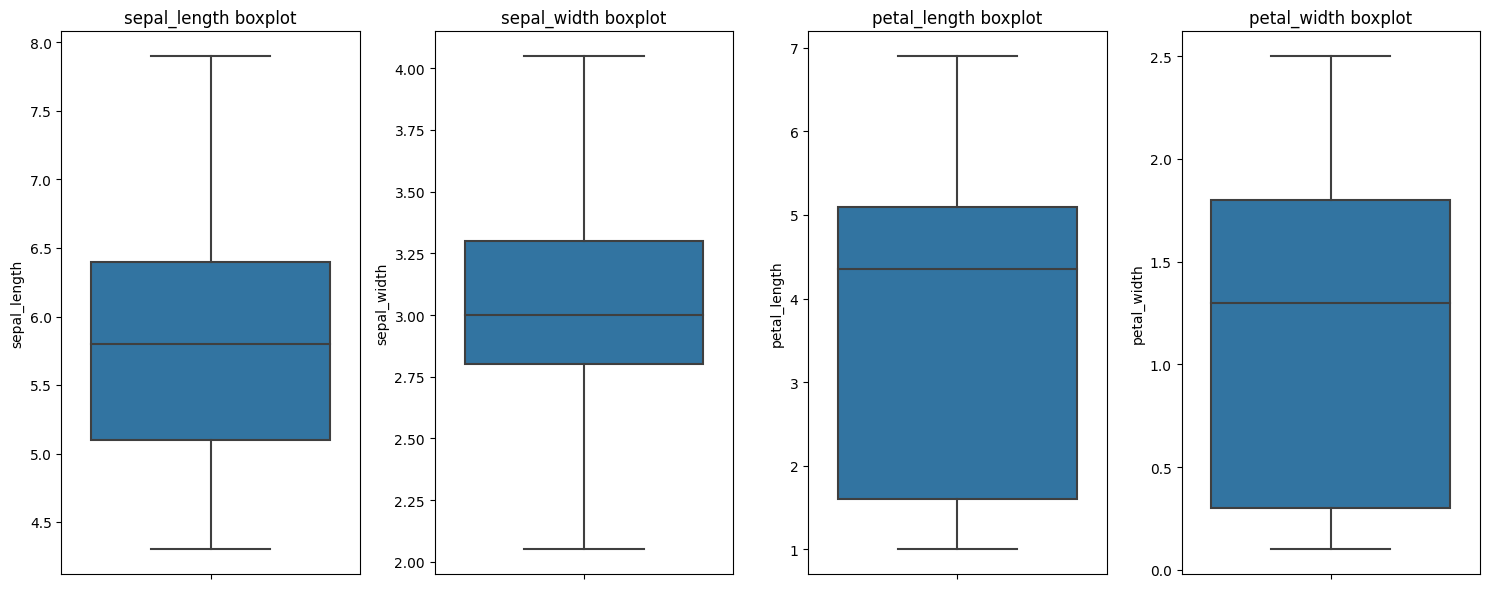

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR   # FIXED here

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# Apply on sepal_width
df = cap_outliers(df, 'sepal_width')

# Boxplots
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):  # exclude 'species'
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"{col} boxplot")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

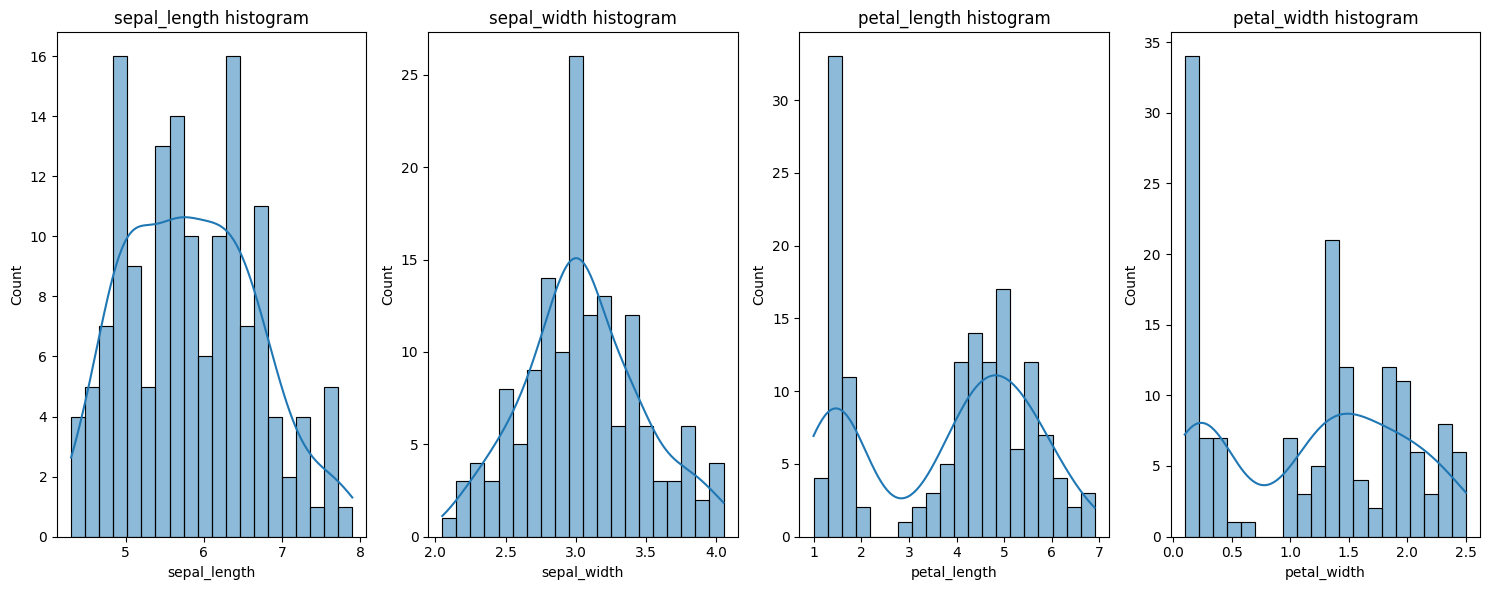

In [ ]:
fig,axes = plt.subplots(1,4, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], bins=20, kde= True, ax= axes[i])
    axes[i].set_title(f"{col} histogram")

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

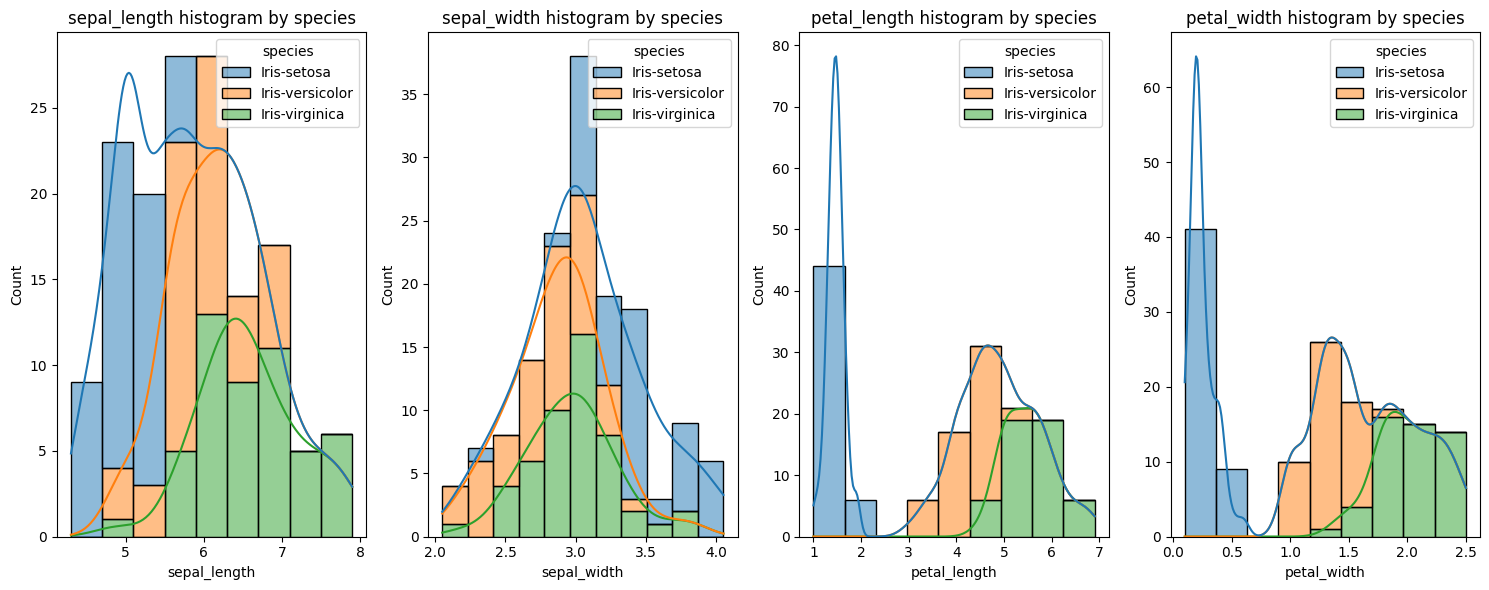

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15,6))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, hue='species', kde=True, ax=axes[i], multiple='stack')
    axes[i].set_title(f'{col} histogram by species')

plt.tight_layout()
plt.show()

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor':1,'Iris-virginica':2})


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


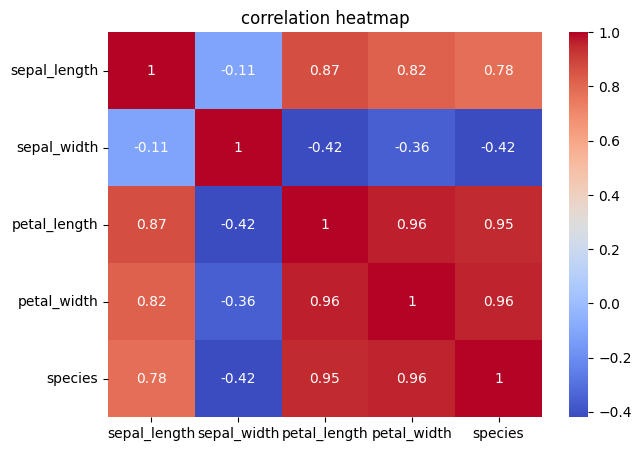

In [ ]:
corr = df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('correlation heatmap')
plt.show()

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('species', axis=1)
Y = df['species']

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

model = LogisticRegression(max_iter=50)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

print(f"accuracy score:{accuracy_score(pred, Y_test)}")
print(f"classification score: {classification_report(pred, Y_test) }")
print(f"confusion_matrix: {confusion_matrix(pred, Y_test)}")

accuracy score:1.0
classification score:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(Y_train, train_pred)
test_acc = accuracy_score(Y_test, test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")


Train Accuracy: 0.9667
Test Accuracy:  1.0000


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5)
print("CV scores:", scores)
print("Mean CV Accuracy:", scores.mean())


CV scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean CV Accuracy: 0.9600000000000002
